<a href="https://colab.research.google.com/github/Souvik0651/Cardiovascular-Risk-Prediction--classification-/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [90]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone project3-clasiffication/data_cardiovascular_risk.csv')

In [91]:
df.head(3)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0


In [92]:
df.tail(3)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [94]:
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [95]:
# df.drop('education',axis='columns',inplace=True)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [97]:
df.is_smoking.unique()

array(['YES', 'NO'], dtype=object)

In [98]:
from sklearn.preprocessing import LabelEncoder

In [99]:
lb_encod = LabelEncoder()

In [100]:
df.sex=lb_encod.fit_transform(df.sex)

In [101]:
df.is_smoking=lb_encod.fit_transform(df.is_smoking)

In [102]:
# in sex column female is 0 & male is 1 and is_smoking 1=yes 0=no
df.head(3)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0


In [103]:
df.tail(30)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3360,3360,56,2.0,1,0,0.0,0.0,0,1,0,241.0,130.0,85.0,25.79,68.0,78.0,0
3361,3361,42,2.0,0,0,0.0,0.0,0,1,0,230.0,142.5,97.5,29.94,75.0,75.0,0
3362,3362,48,4.0,1,0,0.0,0.0,0,0,0,206.0,118.0,81.0,28.13,72.0,87.0,0
3363,3363,45,3.0,1,1,23.0,0.0,0,0,0,263.0,115.0,76.0,24.94,68.0,78.0,0
3364,3364,62,1.0,0,0,0.0,0.0,0,1,0,268.0,143.5,90.0,29.64,88.0,83.0,0
3365,3365,55,1.0,0,0,0.0,0.0,0,0,0,310.0,135.0,76.5,26.31,110.0,74.0,0
3366,3366,43,4.0,0,1,20.0,0.0,0,0,0,201.0,129.0,92.0,24.54,88.0,63.0,0
3367,3367,59,3.0,1,1,20.0,0.0,0,1,0,206.0,187.0,97.0,26.00,100.0,69.0,0
3368,3368,40,4.0,1,1,25.0,0.0,0,0,0,258.0,112.0,78.0,28.57,80.0,70.0,0
3369,3369,44,1.0,0,1,5.0,0.0,0,0,0,205.0,120.0,83.5,24.30,67.0,77.0,0


In [104]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   int64  
 4   is_smoking       3390 non-null   int64  
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [106]:
df.describe()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390.000000,3390.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,0.432743,0.497640,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,0.495529,0.500068,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,1.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,1.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [107]:
df.cigsPerDay.fillna(df.cigsPerDay.median(),inplace=True)
df.cigsPerDay=df.cigsPerDay.astype('int')

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   int64  
 4   is_smoking       3390 non-null   int64  
 5   cigsPerDay       3390 non-null   int64  
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(8),

In [109]:
df.BPMeds .unique()

array([ 0., nan,  1.])

In [110]:
df.BPMeds=df.BPMeds.fillna(df.BPMeds.mode()[0])
df.BPMeds=df.BPMeds.astype('int')

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   int64  
 4   is_smoking       3390 non-null   int64  
 5   cigsPerDay       3390 non-null   int64  
 6   BPMeds           3390 non-null   int64  
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(7),

In [112]:
df.totChol=df.totChol.fillna(df.totChol.median())
df.totChol=df.totChol.astype('int')

In [113]:
df.BMI=df.BMI.fillna(df.BMI.median())

In [114]:
df.heartRate.unique()

array([ 90.,  72.,  88.,  68.,  70.,  85.,  75.,  60.,  86.,  80.,  74.,
       100.,  89.,  92.,  82.,  87.,  58.,  79.,  78.,  76.,  69.,  59.,
        67.,  50.,  73.,  66.,  65.,  62., 110.,  83.,  64.,  63.,  96.,
        55.,  77., 112.,  84.,  95.,  61., 120.,  93.,  94., 104.,  52.,
        56.,  98., 106.,  48.,  54.,  81., 115., 103.,  71., 107.,  57.,
       143.,  91.,  45., 102., 108.,  53.,  47.,  nan, 125., 105., 122.,
        51., 140.,  97.])

In [115]:
df.drop(df[df.heartRate.isna()].index,inplace=True)
df.heartRate=df.heartRate.astype('int')

In [116]:
df.glucose.fillna(df.glucose.median(),inplace=True)

In [117]:
df.glucose=df.glucose.astype('int')

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3389 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3389 non-null   int64  
 1   age              3389 non-null   int64  
 2   education        3302 non-null   float64
 3   sex              3389 non-null   int64  
 4   is_smoking       3389 non-null   int64  
 5   cigsPerDay       3389 non-null   int64  
 6   BPMeds           3389 non-null   int64  
 7   prevalentStroke  3389 non-null   int64  
 8   prevalentHyp     3389 non-null   int64  
 9   diabetes         3389 non-null   int64  
 10  totChol          3389 non-null   int64  
 11  sysBP            3389 non-null   float64
 12  diaBP            3389 non-null   float64
 13  BMI              3389 non-null   float64
 14  heartRate        3389 non-null   int64  
 15  glucose          3389 non-null   int64  
 16  TenYearCHD       3389 non-null   int64  
dtypes: float64(4),

In [119]:
df.corr()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,1.000000,0.016921,-0.030669,0.001110,-0.001418,-0.018029,0.006998,-0.038881,0.013376,0.003675,-0.019830,0.019851,0.000771,0.039822,0.024684,0.014225,0.010094
age,0.016921,1.000000,-0.172170,-0.042477,-0.211615,-0.191937,0.122252,0.059103,0.308322,0.108001,0.272281,0.404316,0.222328,0.137127,-0.002596,0.112245,0.224028
education,-0.030669,-0.172170,1.000000,0.030544,0.028184,0.010928,-0.019730,-0.034222,-0.084432,-0.052067,-0.020699,-0.136765,-0.061001,-0.132789,-0.046980,-0.037993,-0.052117
sex,0.001110,-0.042477,0.030544,1.000000,0.215219,0.329144,-0.043141,-0.011248,0.002575,0.008910,-0.069921,-0.037999,0.059077,0.086831,-0.118702,-0.003152,0.083931
is_smoking,-0.001418,-0.211615,0.028184,0.215219,1.000000,0.763227,-0.037487,-0.043686,-0.119818,-0.053293,-0.046893,-0.146343,-0.124149,-0.173004,0.062185,-0.059482,0.033472
cigsPerDay,-0.018029,-0.191937,0.010928,0.329144,0.763227,1.000000,-0.035691,-0.041561,-0.078365,-0.048082,-0.025260,-0.100805,-0.068183,-0.100039,0.066253,-0.066471,0.067551
BPMeds,0.006998,0.122252,-0.019730,-0.043141,-0.037487,-0.035691,1.000000,0.116179,0.257051,0.070925,0.080899,0.260601,0.198760,0.087702,0.018103,0.061379,0.087545
prevalentStroke,-0.038881,0.059103,-0.034222,-0.011248,-0.043686,-0.041561,0.116179,1.000000,0.071710,0.010111,-0.010779,0.057638,0.047223,0.017054,-0.019184,0.023672,0.068741
prevalentHyp,0.013376,0.308322,-0.084432,0.002575,-0.119818,-0.078365,0.257051,0.071710,1.000000,0.082663,0.158922,0.699061,0.613418,0.299372,0.150815,0.082817,0.165703
diabetes,0.003675,0.108001,-0.052067,0.008910,-0.053293,-0.048082,0.070925,0.010111,0.082663,1.000000,0.059177,0.124156,0.061138,0.087843,0.039742,0.609779,0.103881


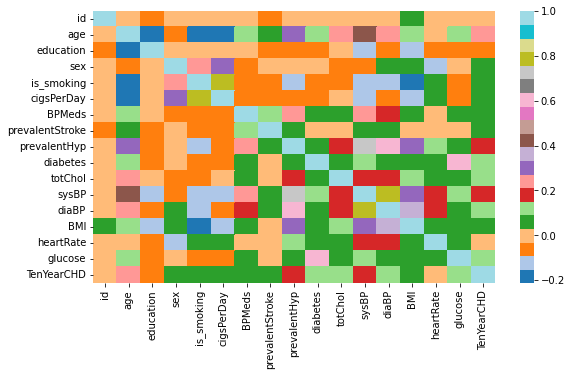

In [120]:
sns.heatmap(data=df.corr(),cmap='tab20')

In [121]:
# we can see id & heartrate has 0 correlation with Ten Year CHD which is dependent variable
df.drop(['id','heartRate'],axis='columns',inplace=True)

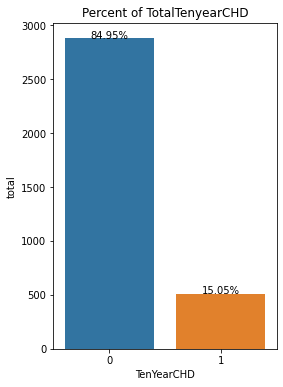

In [122]:
plt.rcParams['figure.figsize']=(4,6)
ax=sns.countplot(x='TenYearCHD',data=df)
ax.set(ylabel='total', title='Percent of TotalTenyearCHD')
total=float(len(df))
for p in ax.patches:
    # print(p)
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


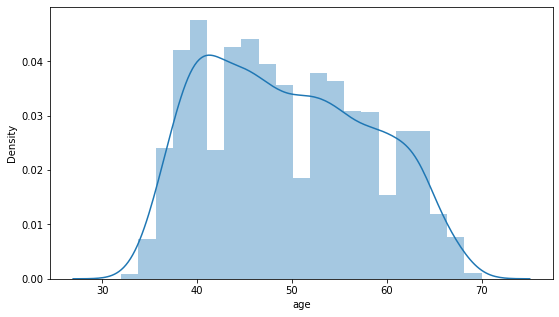

In [123]:
plt.rcParams['figure.figsize']=(9,5)
sns.distplot(df['age'])

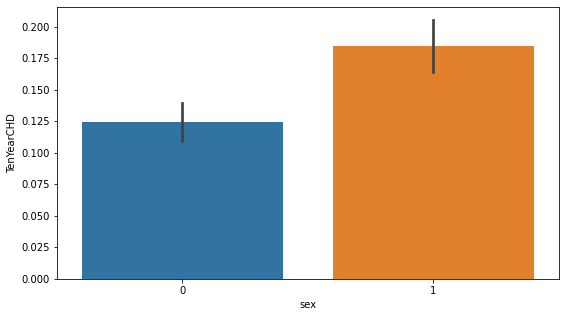

In [124]:
sns.barplot(x ='sex', y ='TenYearCHD', data = df)


In [125]:
df

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,glucose,TenYearCHD
0,64,2.0,0,1,3,0,0,0,0,221,148.0,85.0,25.38,80,1
1,36,4.0,1,0,0,0,0,1,0,212,168.0,98.0,29.77,75,0
2,46,1.0,0,1,10,0,0,0,0,250,116.0,71.0,20.35,94,0
3,50,1.0,1,1,20,0,0,1,0,233,158.0,88.0,28.26,94,1
4,64,1.0,0,1,30,0,0,0,0,241,136.5,85.0,26.42,77,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,0,0,0,0,0,0,0,261,123.5,79.0,29.28,103,0
3386,46,1.0,0,0,0,0,0,0,0,199,102.0,56.0,21.96,84,0
3387,44,3.0,1,1,3,0,0,1,0,352,164.0,119.0,28.92,72,1
3388,60,1.0,1,0,0,0,0,1,0,191,167.0,105.0,23.01,85,0


In [125]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LogisticRegression